In [22]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries for linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Saving model
import joblib 

In [23]:
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\Regression Practice Projects - ED & ML\Apartment Price\apartment_prices.csv")
df.head()

,Squaremeter,Price
0,70,351
1,72,39
2,91,473
3,58,282
4,49,3


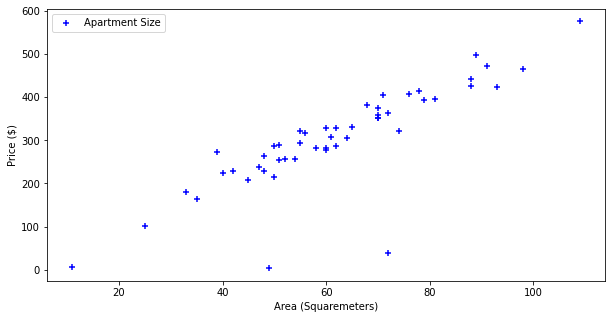

In [24]:
# Getting an idea of out data via a scatter plot
%matplotlib inline 

# Setting figure size
plt.figure(figsize=(10,5))

# Labelling axis
plt.xlabel('Area (Squaremeters)') # Setting label for the x axis
plt.ylabel('Price ($)') # Setting label for the y axis

# Plotting general data - scatter
plt.scatter(df.Squaremeter, df.Price, color='blue', marker='+', label = 'Apartment Size') # Plotting graph

#Include labels
plt.legend()

We can see two obvious outliers:
    - ~47 Squaremeter, ~$0
- ~71 Squaremeter, ~$60

In [25]:
# Splitting data
x = df['Squaremeter']
y = df['Price']
x = x.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) #Can add ,random_state = 10) to keep samples the same

In [26]:
# Fit Model 
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's look at getting the point for line of best fit:

y = mx + b

- m = The coefficient, "co" meaning joint - in this case with the variable "x"
- b = The intercept


In [27]:
# joblib.dump(model_variable_name, "model_save_name")
joblib.dump(reg, '4_1_ApartmentPrices_LR')

['4_1_ApartmentPrices_LR']

In [28]:
# new_model_variable = joblib.load("model_save_name")
## AP = Apartment Prices
AP_model = joblib.load('4_1_ApartmentPrices_LR')

In [29]:
# Automatic prediction
AP_model.predict(x_test) # syntax; reg.predict([[x], [x], [x]]) or reg.predict([[x]]) or reg.predict(x)

array([264.23040468, 429.74279166, 342.11858679, 269.09841606,
        54.90591526, 395.66671199, 434.61080304, 235.02233639,
       196.07824533, 312.9105185 ])

In [30]:
# Manual prediction - how it works essentially
coefficient = AP_model.coef_ # m
intercept = AP_model.intercept_ # b

print(f"The coefficient is: {coefficient}")
print(f"The intercept is: {intercept}")
(coefficient * x_test) + intercept # Multiply by a random vaiable 

The coefficient is: [4.86801138]
The intercept is: 1.357790057394709


array([[264.23040468],
       [429.74279166],
       [342.11858679],
       [269.09841606],
       [ 54.90591526],
       [395.66671199],
       [434.61080304],
       [235.02233639],
       [196.07824533],
       [312.9105185 ]])

In [31]:
reg.score(x_test,y_test) # The score is 77.3% 

0.9511837622879329

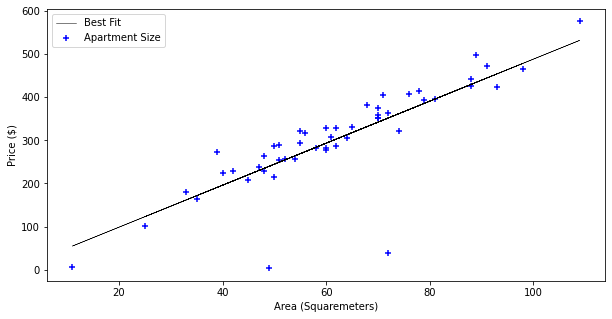

In [32]:
%matplotlib inline

# Set figure size
plt.figure(figsize=(10, 5))

# Assigning labels to axis
plt.xlabel('Area (Squaremeters)') # x axis
plt.ylabel('Price ($)') # y axis

# Plotting general data - scatter
plt.scatter(df.Squaremeter, df.Price, color='blue', marker='+', label = 'Apartment Size') 

# Plotting line of best fit - line.
## Syntax; plt.plot(x, reg.predict(x)...) : reg.predict(x) = y = m*x + b
plt.plot(df.Squaremeter, AP_model.predict(x),color='black', label = 'Best Fit', linewidth = 0.5)

# Include labels
plt.legend()